In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_percentage_error

# STEP 1: Load and prepare data
df_poly_all = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NN-RONALD\Columbia_Return_Table.csv')

# Drop columns with all NaN values and total sum of 0
non_zero_cols = df_poly_all.select_dtypes(include='number').columns[
    df_poly_all.select_dtypes(include='number').sum() != 0
]
df_poly_all = df_poly_all[non_zero_cols.tolist() + df_poly_all.select_dtypes(exclude='number').columns.tolist()]

# Drop irrelevant columns
df_poly_all = df_poly_all.drop(columns=['System', 'River', 'Unnamed: 0'])

# STEP 2: Define features and target
target = 'Total_Returns'
features = [col for col in df_poly_all.columns if col != target]

# STEP 3: Split train/test
train_df = df_poly_all[df_poly_all['ReturnYear'] <= 2020]
test_df = df_poly_all[df_poly_all['ReturnYear'].isin([2021, 2022, 2023, 2024])]

X_train = train_df[features]
y_train = train_df[target]
X_test = test_df[features]
y_test = test_df[target]

# STEP 4: Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# STEP 5: Apply polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# STEP 6: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# STEP 7: Predict and evaluate
y_pred = model.predict(X_test_poly)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

# STEP 8: Print results
print("Polynomial Regression (Train ≤ 2020 | Test: 2021–2024)")
print("-" * 50)
for i in range(len(y_test)):
    print(f"Year: {test_df['ReturnYear'].values[i]}")
    print(f"Prediction: {y_pred[i]:,.0f}")
    print(f"Actual:    {y_test.values[i]:,.0f}")
    print(f"Error:     {abs(y_pred[i] - y_test.values[i]):,.0f}")
    print(f"% of Actual: {round((y_pred[i] / y_test.values[i]) * 100, 2)}%")
    print("-" * 50)

print(f"MAE:  {mae:,.2f}")
print(f"R²:   {r2:.4f}")
print(f"MAPE: {mape * 100:.2f}%")


Polynomial Regression (Train ≤ 2020 | Test: 2021–2024)
--------------------------------------------------
Year: 2021
Prediction: 223,349
Actual:    151,765
Error:     71,584
% of Actual: 147.17%
--------------------------------------------------
Year: 2022
Prediction: 587,292
Actual:    663,253
Error:     75,961
% of Actual: 88.55%
--------------------------------------------------
Year: 2023
Prediction: 262,058
Actual:    327,600
Error:     65,542
% of Actual: 79.99%
--------------------------------------------------
Year: 2024
Prediction: 609,720
Actual:    755,909
Error:     146,189
% of Actual: 80.66%
--------------------------------------------------
MAE:  89,819.17
R²:   0.8480
MAPE: 24.49%


check the order by years before train

In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

# STEP 1: Load and prepare data
df_poly_all = pd.read_csv(r'C:\Users\MuriloFarias\Desktop\NN-RONALD\Columbia_Return_Table.csv')

# Drop columns with all NaN values and total sum of 0
non_zero_cols = df_poly_all.select_dtypes(include='number').columns[
    df_poly_all.select_dtypes(include='number').sum() != 0
]
df_poly_all = df_poly_all[non_zero_cols.tolist() + df_poly_all.select_dtypes(exclude='number').columns.tolist()]

# Drop irrelevant columns
df_poly_all = df_poly_all.drop(columns=['System', 'River', 'Unnamed: 0'])

# Define features and target
target = 'Total_Returns'
features = [col for col in df_poly_all.columns if col != target]

# STEP 2: Train on data ≤ 2024
train_df = df_poly_all[df_poly_all['ReturnYear'] <= 2024]
X_train = train_df[features]
y_train = train_df[target]

# STEP 3: Create synthetic 2025 row using mean of 2019–2024
years_to_average = [2019, 2020, 2021, 2022, 2023, 2024]
recent_years_df = df_poly_all[df_poly_all['ReturnYear'].isin(years_to_average)]
avg_row = recent_years_df[features].mean().to_frame().T
avg_row['ReturnYear'] = 2025
X_test = avg_row[features]  # ensure correct order

# STEP 4: Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

# STEP 5: Train and Predict
model = LinearRegression()
model.fit(X_train_poly, y_train)
y_pred_2025 = model.predict(X_test_poly)

print("2025 Forecast using Polynomial Regression (based on 2019–2024 mean)")
print(f"Predicted Total_Returns: {y_pred_2025[0]:,.0f}")


2025 Forecast using Polynomial Regression (based on 2019–2024 mean)
Predicted Total_Returns: 382,975


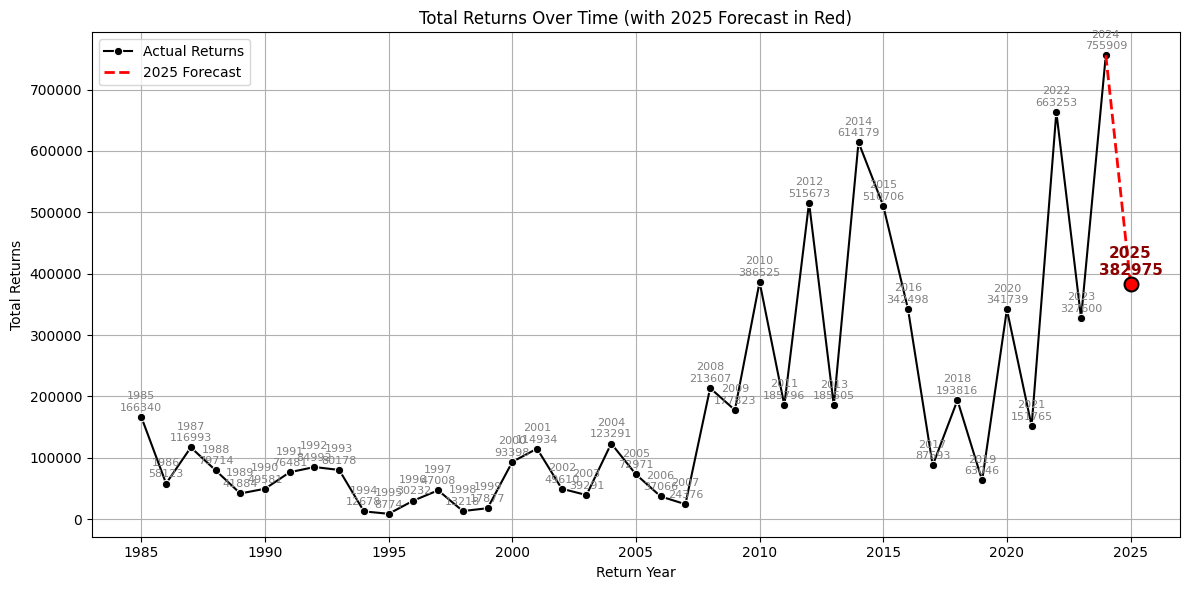

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Use full dataset (without missing targets)
df_plot = df_poly_all[['ReturnYear', 'Total_Returns']].dropna().copy()

# Step 2: Plot actual data (black line)
plt.figure(figsize=(12, 6))
sns.lineplot(x='ReturnYear', y='Total_Returns', data=df_plot, marker='o', color='black', label='Actual Returns')

# Step 3: Annotate historical points (gray text)
for i in range(len(df_plot)):
    year = int(df_plot['ReturnYear'].iloc[i])
    value = df_plot['Total_Returns'].iloc[i]
    plt.text(year, value + 10000, f"{year}\n{int(value)}", fontsize=8, ha='center', color='gray')

# Step 4: Get 2024 value from dataset 
if 2024 not in df_plot['ReturnYear'].values:
    value_2024 = df_poly_all[df_poly_all['ReturnYear'] == 2024]['Total_Returns'].values[0]
else:
    value_2024 = df_plot[df_plot['ReturnYear'] == 2024]['Total_Returns'].values[0]

# Step 5: Plot 2025 prediction in RED
year_2025 = 2025
value_2025 = y_pred_2025[0]
plt.plot([2024, 2025], [value_2024, value_2025], color='red', linestyle='--', linewidth=2, label='2025 Forecast')
plt.scatter(year_2025, value_2025, color='red', s=100, edgecolors='black', linewidths=1.5, zorder=5)
plt.text(year_2025, value_2025 + 15000, f"{year_2025}\n{int(value_2025)}",
         fontsize=11, fontweight='bold', ha='center', color='darkred')

# Final formatting
plt.title("Total Returns Over Time (with 2025 Forecast in Red)")
plt.xlabel("Return Year")
plt.ylabel("Total Returns")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
